<a href="https://colab.research.google.com/github/szostaklab/REVERSE/blob/main/REVERSE_Personal_Use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Enter Number of Rounds

In [1]:
##USER EDIT
rounds = 4
##USER EDIT

STEP 2: Enter Quality Cutoff

Should we remove low quality reads?

In [2]:
##USER EDIT
remove_low_quality_reads = 'yes'
quality_cutoff = 90
##USER EDIT

STEP 3: Upload Selection Round FASTQ Files (enter all filenames in quotes seperated by commas and drag all files into upload panel)

In [3]:
##USER EDIT
filenames = ['round1.fastq', 'round2.fastq', 'round3.fastq', 'round4.fastq']
##USER EDIT

FILTER BY QUALITY

In [4]:
#Open data
uploaded_files = []
for file in filenames:
  uploaded_files.append(open(file).readlines())

all_seqs = []
all_high_qual_seqs_noprocess=[]

for file in range(rounds):

  quality = uploaded_files[file][3::4]
  seqs = uploaded_files[file][1::4]

  all_seqs.append(seqs)

  origonal_seqs = all_seqs

  #NO FILTER BY QUALITY
  if filter == 'unfiltered':
      all_high_qual_seqs_noprocess = all_seqs

  #FILTER BY QUALITY
  else:
      high_quality = []
      acceptable_quals_1_percent_error = [5,6,7,8,9,':',';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
      for seq in range(len(quality)):
        overlap=0
        for char in list(set(quality[seq]).intersection(acceptable_quals_1_percent_error)):
              overlap+=quality[seq].count(char)

        if overlap/len(quality[1]) > quality_cutoff/100:
              high_quality.append(seqs[seq].strip("\n"))
      all_high_qual_seqs_noprocess.append(high_quality)

SEE TOP HIGH QUALITY SEQS FROM LAST ROUND

In [5]:
from collections import Counter
number_to_see = 10
seqs = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs_noprocess[-1])).items(), key=lambda item: item[1], reverse=True)}.keys())
reads = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs_noprocess[-1])).items(), key=lambda item: item[1], reverse=True)}.values())
for element in range(number_to_see):
  print(seqs[element], reads[element])

CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGAGCTCAGTCTGCCAATTAGCCCGCACGGTTGGCAGCATTCCGCTGTCCGT 1306
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGTGGTTCCGCCGCTCATCTGTCCTAGTCAGCGCTAGCTAGGCGCTGTCCGT 404
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGGATTTATCCCAATTCTCTGCTTGGGCACCAATTTCACTAACGCTGTCCGT 210
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGCGCTTAGGCTTACAAATCCGCACGACTGTGATAAGGGTTCCGCTGTCCGT 192
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGTTATCCGCACTTTAAAATTAGAGGAAATCGGCACCCAATACGCTCCGTGA 137
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGGGGTGAGCAATTACACCTCTTAAGGTCTTCCGCAGTGGCTCGCTGTCCGT 109
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGCAGTTCTGTTCTGCTAACATTCCGCAAGCTCACGGTCTCTCGCTGTCCGT 108
CGGTAGGTCCCTTAGCCAAAAAAGGGCAGCGAGCTCAGTCTGCCAATTAGCCCGCACGGTTGGCAGCATTCCGCTGTCCGT 102
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGCCACTTCACGCGGTGGTCTGTCCAATTCAGCGAAACTTTTCGCTGTCCGT 89
CGGTAGGTCCCTTAGCCAAAAAAGGACAGCGAGCTCAGTCTGCCAATTAGCCCGCACGGTTGGTAGCATTCCGCTGTCCGT 71


MAKE CSV FILES WITH ALL HIGH QUALITY SEQUENCES FROM EACH ROUND

In [6]:
#Make sequence read CSV
for round in range(len(all_high_qual_seqs_noprocess)):
  seqs = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs_noprocess[round])).items(), key=lambda item: item[1], reverse=True)}.keys())
  reads = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs_noprocess[round])).items(), key=lambda item: item[1], reverse=True)}.values())
  with open('high_quality_sequences_round'+str(round+1)+'.csv', 'w') as f:
      f.write('Sequence'+','+'Reads'+'\n')
      for element in range(len(seqs)):
        f.write(str(seqs[element] )+','+str(reads[element])+'\n')

TRIMMER

In [7]:
##USER EDIT
trim_type = 'position'
start, end = [36, 71]
#start, end = ['CC', 'AA']
##USER EDIT

In [8]:
#TRIM
import statistics

if trim_type == 'position':
    
    all_trimmed_seqs = []
    for round in range(len(all_high_qual_seqs_noprocess)):  
      round_trim = [w[start:end] for w in all_high_qual_seqs_noprocess[round]]
      print(round_trim)
      all_lens = [len(i) for i in round_trim]
      trimmed = []
      if len(list(set(all_lens)))>2:
        for seq in round_trim:
          if len(seq) == statistics.mode(all_lens):
                trimmed.append(seq)
        all_trimmed_seqs.append(trimmed)
      else:
        all_trimmed_seqs.append(round_trim)

    orig_trimmed_seqs = []
    for round in range(len(all_seqs)):  
      round_trim = [w[start:end] for w in all_seqs[round]]
      all_lens = [len(i) for i in round_trim]
      trimmed = []
      if len(list(set(all_lens)))>2:
        for seq in round_trim:
          if len(seq) == statistics.mode(all_lens):
                trimmed.append(seq)
        orig_trimmed_seqs.append(trimmed)
      else:
        orig_trimmed_seqs.append(round_trim)
  

if trim_type == 'sequence':

    all_trimmed_seqs = []
    for round in range(len(all_high_qual_seqs_noprocess)):  
      round_trim = []
      for seq in all_high_qual_seqs_noprocess[round]:
        if start in seq and end in seq:
          if seq.index(start) < seq.index(end):
            round_trim.append(seq[seq.index(start)+len(start):seq.index(end)])
      all_lens = [len(i) for i in round_trim]
      trimmed = []
      if len(list(set(all_lens)))>2:
        for seq in round_trim:
          if len(seq) == statistics.mode(all_lens):
                trimmed.append(seq)
        all_trimmed_seqs.append(trimmed)
      else:
        all_trimmed_seqs.append(round_trim)

    orig_trimmed_seqs = []
    for round in range(len(all_seqs)):  
      round_trim = []
      for seq in all_seqs[round]:
        if start in seq and end in seq:
          if seq.index(start) < seq.index(end):
            round_trim.append(seq[seq.index(start)+len(start):seq.index(end)])
      all_lens = [len(i) for i in round_trim]
      trimmed = []
      if len(list(set(all_lens)))>2:
        for seq in round_trim:
          if len(seq) == statistics.mode(all_lens):
                trimmed.append(seq)
        orig_trimmed_seqs.append(trimmed)
      else:
        orig_trimmed_seqs.append(round_trim)

all_high_qual_seqs = all_trimmed_seqs

['CAGGATTTTCAGTATTAAAGCTTTGTCCAAAGGCA', 'TTGAGGAACTGAGTGGTTTACAGAAAGTTTAATCA', 'CGTAATTGTGTTTACAAAGTCGTAGGGTACTTTTC', 'TTCAAATGTCTCCTACGACCGCGCTCATCCGCCAG', 'TGGCAAACCCCTGTAGGGGGGACTATTTATGGATT', 'TAGACAAGCGTGTTGTACTGTTTGCGCAAAGACAC', 'GTGAGTTAAGCGGCAGCATGTTCCACAGCGCCGAG', 'ACAGTTTGAATGTCCTGTGATTCGTTGAATTTCGT', 'GCAAGATTTCCAGCATGACAGAGGTGAAGTCGTTA', 'ACTGCTGTGGGTTAATAGGGAGAATAGGGGACTGG', 'ACTATATGTTGAGACTTTTCTGATTTCGATCACAT', 'GCCTTACTTGACAGCAGGAGTCTAACGAACCAGGC', 'TCGACGGGTTAACGTCATGGCAGTACAGGTGGTTT', 'CTTTAGAATGTGTCATTAGTTCTTGATCCGTGTCA', 'GGTATTTGAGTTATGGACATATACTAAGGCGCAGG', 'CTTTTTGATTGCCAGTTTTGGTGGCAACACCTTTC', 'GTTTACGTGTATCATCGCCCTAGTCGATGAGGTGA', 'GGGAATATTGTTAGCCGAAATGCTGTAATAGGTAG', 'CCCAATGTAGAGAGTTTTGTGTAGCAAGCCGAGTA', 'GTCTACTGTGCGACAGTTACTGGCTCAGTGGCCCT', 'CTGGGTTTTAGCTTATTTTATATCTACGCTGACGT', 'TTTTGGCTATGCTTGACCTATAGGTGACCAGAGGA', 'CGATGTGCTATTGATTGATAAAGGTAAAGGGCAAA', 'TAATTAAAAATCGCCTGAGGTTGATTAGCCTTCTT', 'TCAATTTGGTTGGTACCGTTCACGTTGATATCTTC', 'TTATGATCTGCAGTTTCCAAGGT

REVERSE COMPLEMENT

In [9]:
##USER EDIT
rc = 'yes'
##USER EDIT

In [10]:
#RC
!pip install Bio
from Bio.Seq import Seq

if rc == 'yes':
    all_rc_seqs = []
    for round in range(len(all_high_qual_seqs)):
        all_rc_seqs.append([str(Seq(w).reverse_complement()) for w in all_high_qual_seqs[round]])
    all_high_qual_seqs = all_rc_seqs

    orig_rc_seqs = []
    for round in range(len(orig_trimmed_seqs)):
        orig_rc_seqs.append([str(Seq(w).reverse_complement()) for w in orig_trimmed_seqs[round]])
    orig_trimmed_seqs = orig_rc_seqs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TOP SEQUENCE FINDER

In [57]:
##USER EDIT
sequences_to_find = 5
##USER EDIT

In [58]:
from collections import Counter
seqs = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs[-1])).items(), key=lambda item: item[1], reverse=True)}.keys())
reads = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs[-1])).items(), key=lambda item: item[1], reverse=True)}.values())
for element in range(sequences_to_find):
  print(seqs[element], reads[element])

GAATGCTGCCAACCGTGCGGGCTAATTGGCAGACT 1639
CCTAGCTAGCGCTGACTAGGACAGATGAGCGGCGG 435
TTAGTGAAATTGGTGCCCAAGCAGAGAATTGGGAT 304
GAACCCTTATCACAGTCGTGCGGATTTGTAAGCCT 201
TATTGGGTGCCGATTTCCTCTAATTTTAAAGTGCG 149


MAKE CSV FILES WITH ALL PREPROCESSED SEQUENCES FROM EACH ROUND

In [12]:
#Make sequence read CSV
for round in range(len(all_high_qual_seqs)):
  seqs = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs[round])).items(), key=lambda item: item[1], reverse=True)}.keys())
  reads = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs[round])).items(), key=lambda item: item[1], reverse=True)}.values())
  with open('preprocessed_sequences_round'+str(round+1)+'.csv', 'w') as f:
      f.write('Sequence'+','+'Reads'+'\n')
      for element in range(len(seqs)):
        f.write(str(seqs[element] )+','+str(reads[element])+'\n')

SELECTION STATISTICS

In [13]:
for round in range(len(origonal_seqs)):
  print('Round: '+ str(round+1))
  print('Number of Total Sequences: '+str(len(origonal_seqs[round])))
  print('Number of High Quality Sequences: '+str(len(all_high_qual_seqs[round])))
  print('Number of Unique Sequences: '+str(len(list(set((all_high_qual_seqs[round]))))))
  print('Fraction Unique Sequences: '+str(len(list(set((all_high_qual_seqs[round]))))/len(all_high_qual_seqs[round]))[:6])
  print('')

Round: 1
Number of Total Sequences: 10000
Number of High Quality Sequences: 7071
Number of Unique Sequences: 7011
Fraction Unique Sequences: 0.9915

Round: 2
Number of Total Sequences: 10000
Number of High Quality Sequences: 7213
Number of Unique Sequences: 7174
Fraction Unique Sequences: 0.9945

Round: 3
Number of Total Sequences: 10000
Number of High Quality Sequences: 7015
Number of Unique Sequences: 5096
Fraction Unique Sequences: 0.7264

Round: 4
Number of Total Sequences: 10000
Number of High Quality Sequences: 7140
Number of Unique Sequences: 1922
Fraction Unique Sequences: 0.2691



TOP SEQUENCE TRACKER

In [14]:
##USER EDIT
sequences_to_track = 5
##USER EDIT

[[0.0, 0.0, 0.0094, 0.1813], [0.0, 0.0, 0.0025, 0.0473], [0.0, 0.0001, 0.0089, 0.0335], [0.0, 0.0, 0.0019, 0.0219], [0.0, 0.0, 0.0088, 0.0166]]


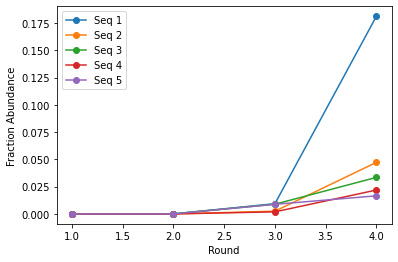

In [32]:
import numpy as np
import matplotlib.pyplot as plt

counted_data = dict(Counter(all_high_qual_seqs[-1]))
raw_data_list = [(k, v) for k, v in counted_data.items()]
top_sequences = sorted(raw_data_list, key = lambda x: x[1], reverse=True)[:sequences_to_track]

all_track = []
for seq in range(len(top_sequences)):
  track = []
  for round in range(len(orig_trimmed_seqs)):
    track.append(orig_trimmed_seqs[round].count(top_sequences[seq][0]) / len(orig_trimmed_seqs[round]))
  all_track.append(track)

for seq in all_track:
  plt.plot(range(1,1+len(seq)), seq, marker = 'o', label = 'Seq '+str(1+all_track.index(seq)))
plt.xlabel('Round')
plt.ylabel('Fraction Abundance')
plt.legend()
print(all_track)

SEQUENCE MOTIF TRACKER

In [33]:
##USER EDIT
motif_to_track = 'ACA'
##USER EDIT

[[0.0, 0.0, 0.0094, 0.1813], [0.0, 0.0, 0.0025, 0.0473], [0.0, 0.0001, 0.0089, 0.0335], [0.0, 0.0, 0.0019, 0.0219], [0.0, 0.0, 0.0088, 0.0166]]


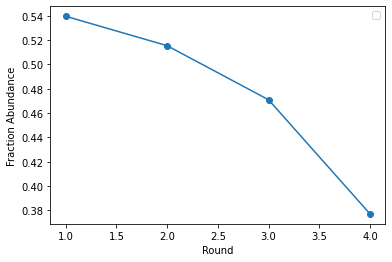

In [55]:
motif_frac = []
for round in range(len(all_high_qual_seqs)):
  counter = 0
  for seq in all_high_qual_seqs[round]:
    if motif_to_track in seq:
      counter+=1
  motif_frac.append(counter/len(all_high_qual_seqs[round]))

plt.plot(range(1,1+len(motif_frac)), motif_frac, marker = 'o')
plt.xlabel('Round')
plt.ylabel('Fraction Abundance')
plt.legend()
print(all_track)

MUTATIONAL INTERMEDIATES FINDER

In [76]:
##USER EDIT
sequence_1 = 'ACCCATTGGTTGGGTGACGTGGCATGTGACGGAAT'
sequence_2 = 'AGCAGGAAAGCGAGGGTATCCTACAAAGTCCAGCG'
##USER EDIT

In [79]:
seq1_flag = 0
for round in orig_trimmed_seqs:
  if sequence_1 in round:
    seq1_flag = 1
if seq1_flag == 0:
  print('Sequence 1 not in pool')

seq2_flag = 0
for round in orig_trimmed_seqs:
  if sequence_2 in round:
    seq2_flag = 1
if seq2_flag == 0:
  print('Sequence 2 not in pool')

same_positions = []
for position in range(len(sequence_1)):
  if sequence_1[position]==sequence_2[position]:
    same_positions.append(position)

intermediate = []

for test_seq in list(set(all_high_qual_seqs[-1])):
  count = 0
  for position in same_positions:
    if test_seq[position]==sequence_1[position]:
        count+=1
    if count > len(same_positions)-1:
        intermediate.append([test_seq, orig_trimmed_seqs[-1].count(test_seq)])

intermediate

[['ACCCATTGGTTGGGTGACGTGGCATGTGACGGAAT', 15],
 ['AGCAGGAAAGCGAGGGTATCCTACAAAGTCCAGCG', 2]]

CLUSTER PEAK FINDER

In [82]:
##USER EDIT
number_of_clusters = 10
number_of_clusters_to_analyze = 3
##USER EDIT

In [143]:
from sklearn.cluster import KMeans

all_labels = []
for round_num in range(len(all_high_qual_seqs)):
    all_high_qual_seqs_unique = list(set(all_high_qual_seqs[round_num]))
    matrix = np.asarray([np.fromstring(str(s), dtype=np.uint8) for s in all_high_qual_seqs_unique]);
    kmeans = KMeans(init="random", n_clusters=number_of_clusters,n_init=10,max_iter=300,random_state=42)
    kmeans.fit(matrix)
    labels = kmeans.labels_[:]
    all_labels.append(list(labels))

top_clusters = []
peak_seqs = []
seqs = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs[-1])).items(), key=lambda item: item[1], reverse=True)}.keys())
reads = list({k: v for k, v in sorted(dict(Counter(all_high_qual_seqs[-1])).items(), key=lambda item: item[1], reverse=True)}.values())

i = 0
while len(top_clusters)<number_of_clusters_to_analyze:
  seq_cluster = labels[all_high_qual_seqs_unique.index(seqs[i])]
  if seq_cluster not in top_clusters:
      top_clusters.append(seq_cluster)
      peak_seqs.append(seqs[i])
  i+=1

print('Cluster Peak Sequences: ')
print(peak_seqs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


Cluster Peak Sequences: 
['GAATGCTGCCAACCGTGCGGGCTAATTGGCAGACT', 'CCTAGCTAGCGCTGACTAGGACAGATGAGCGGCGG', 'TTAGTGAAATTGGTGCCCAAGCAGAGAATTGGGAT']


MAKE CSV FILES WITH ALL CLUSTERED SEQUENCES FROM EACH ROUND

In [158]:
for round in range(len(all_high_qual_seqs)):
  all_high_qual_seqs_unique = list(set(all_high_qual_seqs[round]))
  with open('clustered_sequences_round'+str(round+1)+'.csv', 'w') as f:
    f.write('Sequence,'+'Cluster,'+'Counts\n')
    for seq in range(len(all_high_qual_seqs_unique)):
      f.write(str(all_high_qual_seqs_unique[seq])+','+str(all_labels[round][seq])+','+str(all_high_qual_seqs[round].count(all_high_qual_seqs_unique[seq]))+'\n')

CLUSTER PEAK TRACKER

In [160]:
##USER EDIT
number_of_clusters_to_track = 3
##USER EDIT

[[0.0, 0.0, 0.0094, 0.1813], [0.0, 0.0, 0.0025, 0.0473], [0.0, 0.0001, 0.0089, 0.0335]]


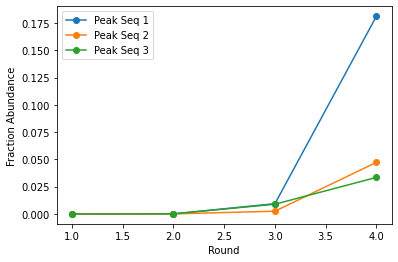

In [164]:
i = 0
while len(top_clusters)<number_of_clusters_to_track:
  seq_cluster = labels[all_high_qual_seqs_unique.index(seqs[i])]
  if seq_cluster not in top_clusters:
      top_clusters.append(seq_cluster)
      peak_seqs.append(seqs[i])
  i+=1

counted_data = dict(Counter(all_high_qual_seqs[-1]))
raw_data_list = [(k, v) for k, v in counted_data.items()]
top_sequences = peak_seqs

all_track = []
for seq in range(len(top_sequences)):
  track = []
  for round in range(len(orig_trimmed_seqs)):
    track.append(orig_trimmed_seqs[round].count(top_sequences[seq]) / len(orig_trimmed_seqs[round]))
  all_track.append(track)

for seq in all_track:
  plt.plot(range(1,1+len(seq)), seq, marker = 'o', label = 'Peak Seq '+str(1+all_track.index(seq)))
plt.xlabel('Round')
plt.ylabel('Fraction Abundance')
plt.legend()
print(all_track)

CONSERVATION FINDER

In [168]:
##USER EDIT
cluster_rank_for_heatmap = 1
##USER EDIT

In [188]:
import seaborn as sns
i = 0
cluster_associate = []
while len(cluster_associate)<cluster_rank_for_heatmap:
  seq_cluster = labels[all_high_qual_seqs_unique.index(seqs[i])]
  if seq_cluster not in cluster_associate:
      cluster_associate.append(seq_cluster)
  i+=1

seqs_in_cluster = []
for lab in range(len(all_labels[-1])):
  if all_labels[-1][lab] == cluster_associate[-1]:
    seqs_in_cluster.append(list(set(all_high_qual_seqs[-1]))[lab])

heatmap_data = []

for position in range(len(seqs_in_cluster[0])):
    options = []
    for seq in seqs_in_cluster:
        options.append(seq[position])

    raw_options = [(k, v) for k, v in Counter(options).items()]
    nuc_list = []
    for element in raw_options:
        nuc_list.append(element[0])
    if 'A' not in nuc_list:
        raw_options.append(('A', 0))
    if 'C' not in nuc_list:
        raw_options.append(('C', 0))
    if 'G' not in nuc_list:
        raw_options.append(('G', 0))
    if 'T' not in nuc_list:
        raw_options.append(('T', 0))
    raw_options = sorted(raw_options, key=lambda x: x[0])

    heatmap_data_position = []
    for element in raw_options:
        heatmap_data_position.append(element[1]/len(seqs_in_cluster))
    heatmap_data.append(heatmap_data_position)
heatmap_data = np.array(heatmap_data).transpose()

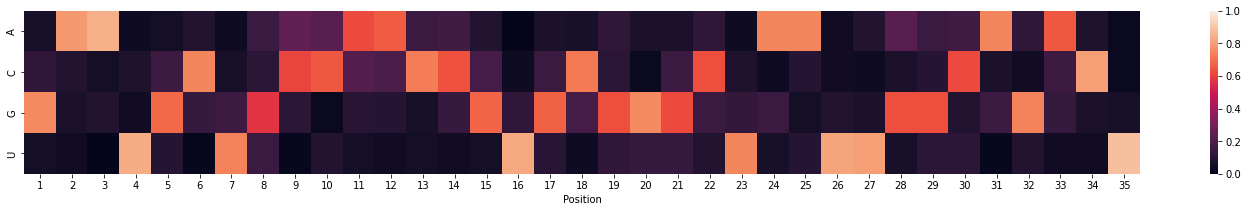

In [203]:
fig, ax = plt.subplots(figsize=(25,3))
sns.heatmap(heatmap_data, vmin=0, vmax=1)
ax.set_xlabel('Position')
ax.set_yticklabels(['A','C','G','U'])
ax.set_xticklabels(range(1,1+len(heatmap_data[0])));